In [708]:
import pandas as pd

In [709]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Overview

In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [711]:
list_item=[]
for col in df.columns[1:]:
    list_item.append([col, df[col].dtypes, df[col].nunique(), df[col].unique()])

tabel_col_unique = pd.DataFrame(data=list_item, columns=['Feature / Column Name','Data Type','Number of Unique','List Unique'])
tabel_col_unique

,Feature / Column Name,Data Type,Number of Unique,List Unique
0,gender,object,2,"[Female, Male]"
1,SeniorCitizen,int64,2,"[0, 1]"
2,Partner,object,2,"[Yes, No]"
3,Dependents,object,2,"[No, Yes]"
4,tenure,int64,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
5,PhoneService,object,2,"[No, Yes]"
6,MultipleLines,object,3,"[No phone service, No, Yes]"
7,InternetService,object,3,"[DSL, Fiber optic, No]"
8,OnlineSecurity,object,3,"[No, Yes, No internet service]"
9,OnlineBackup,object,3,"[Yes, No, No internet service]"


In [712]:
# Check for duplicated rows
duplicated_rows = df[df.duplicated()]
duplicated_rows

# There are no duplicated rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [713]:
# Check for negative values in the dataframe
negative_values = df[df.select_dtypes(include=[int, float]).lt(0).any(axis=1)]
negative_values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [714]:
# Check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis

## Categorical

In [715]:
import matplotlib.pyplot as plt
import seaborn as sns

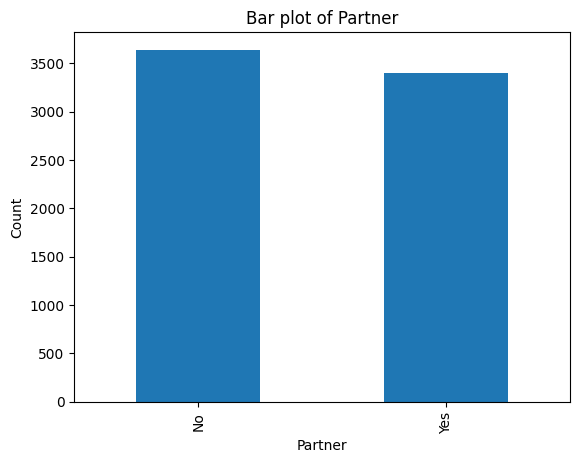

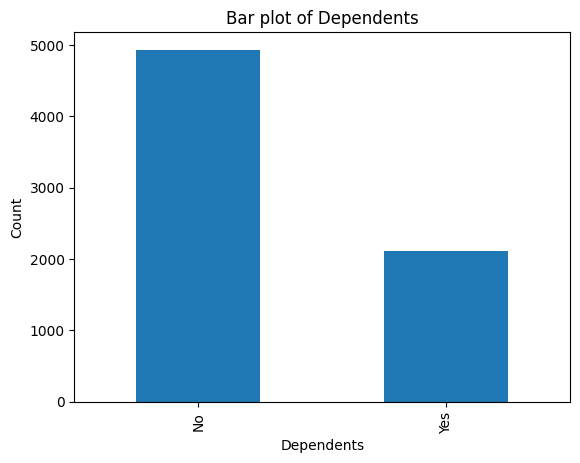

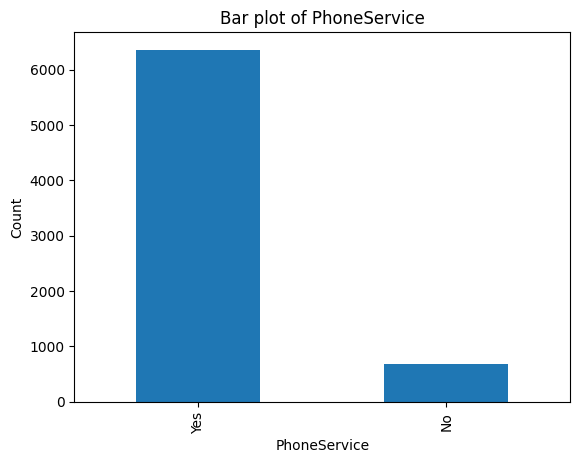

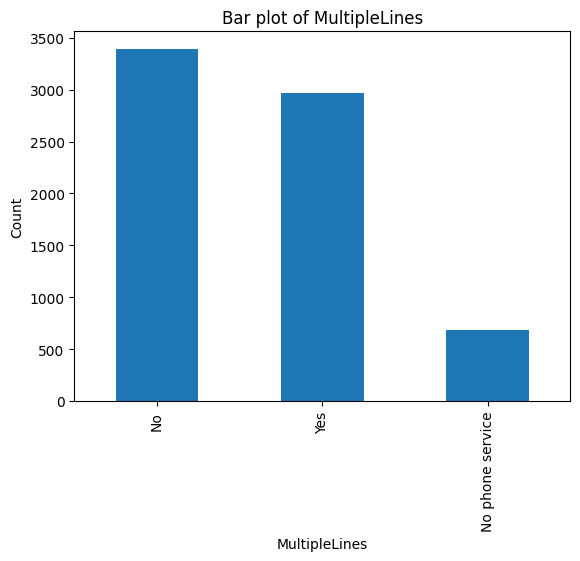

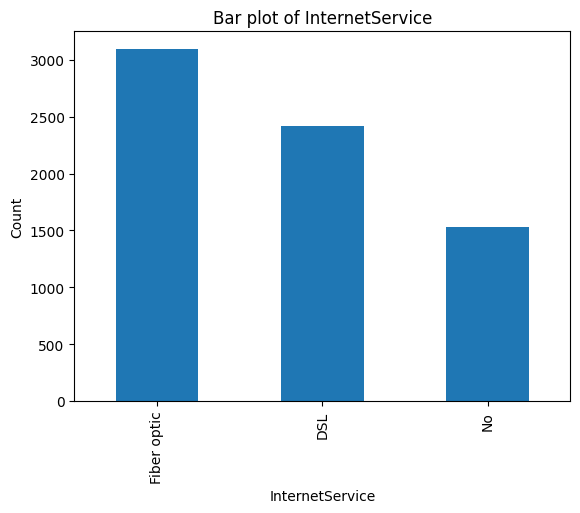

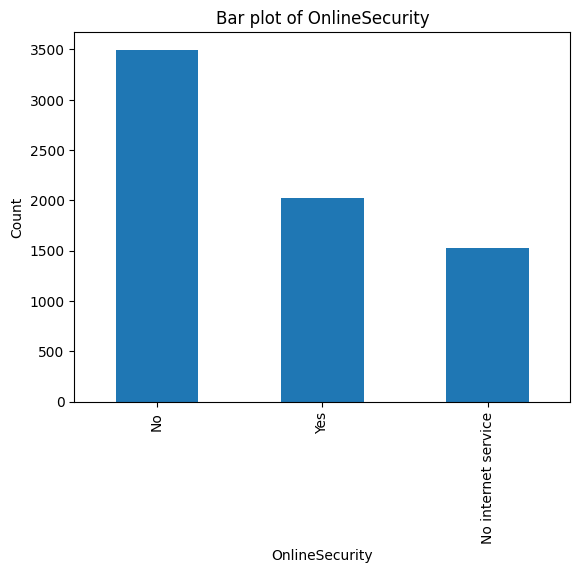

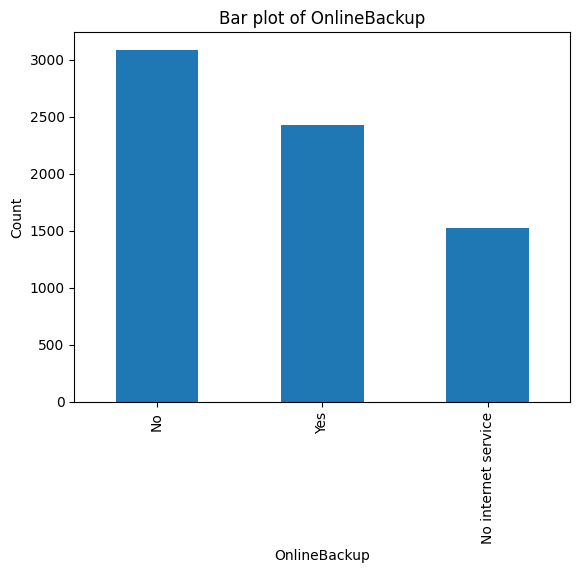

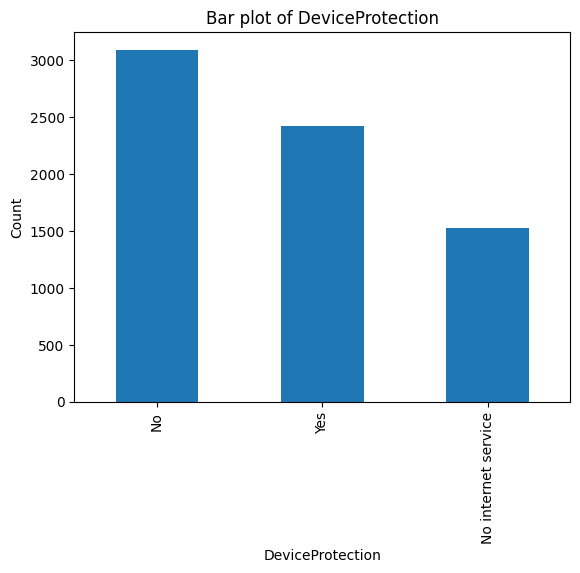

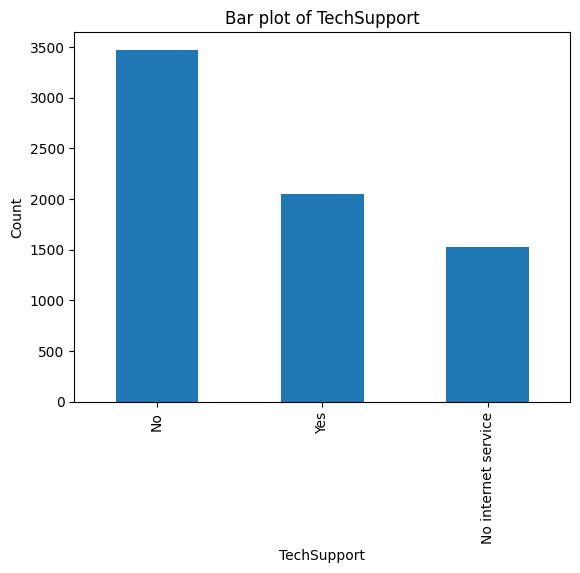

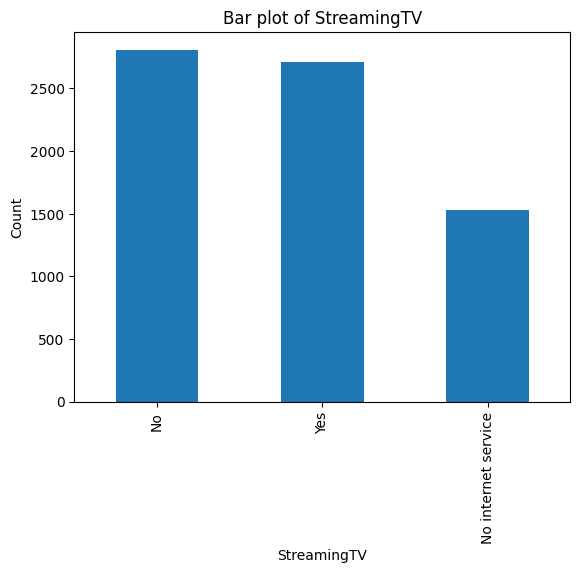

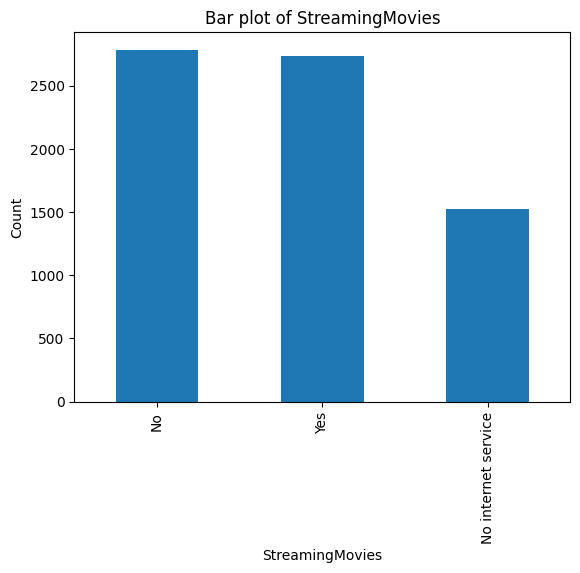

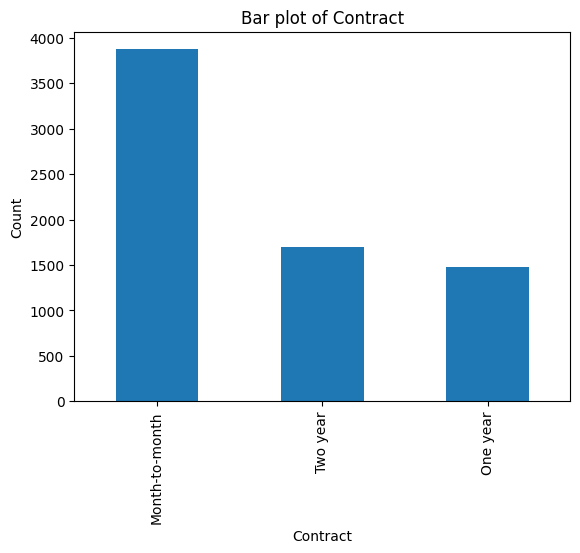

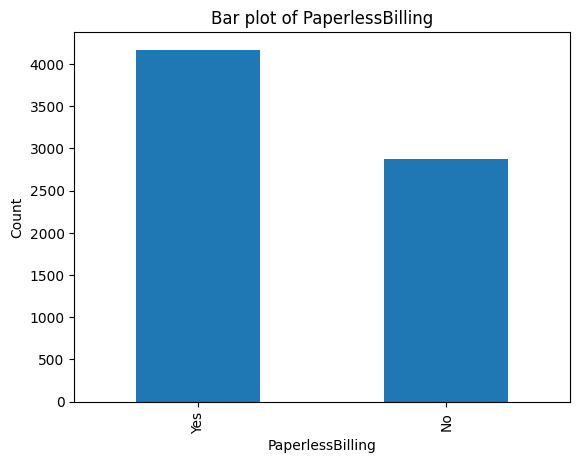

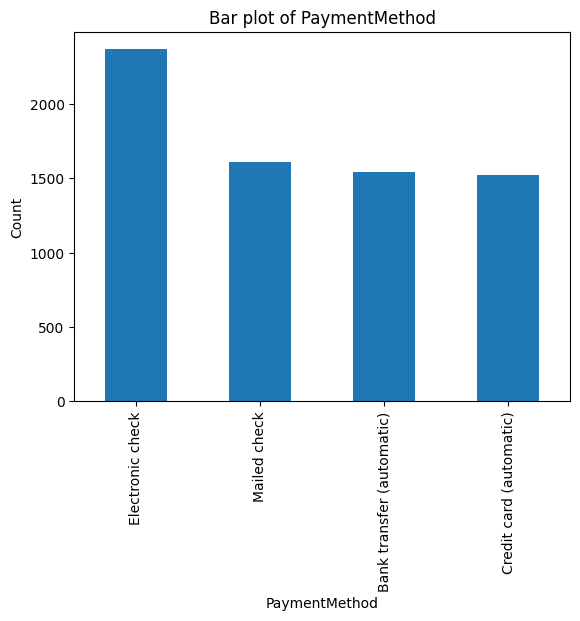

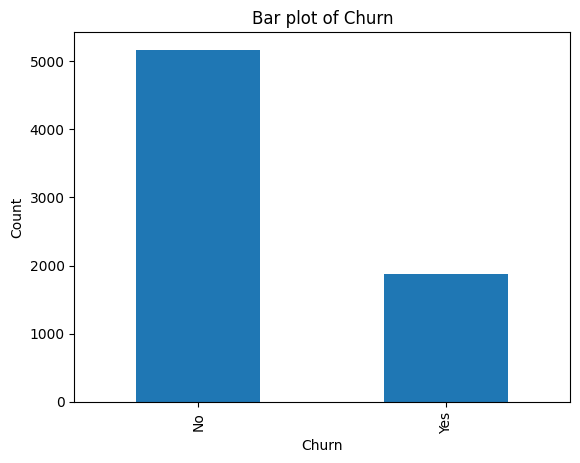

In [716]:
categoricals = ['Partner',
 'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Churn']

for column in categoricals:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Numerical

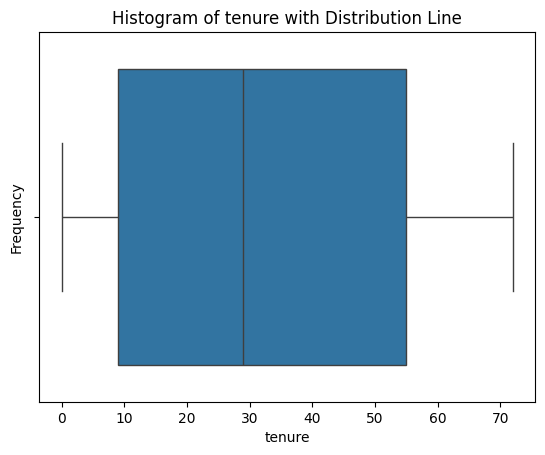

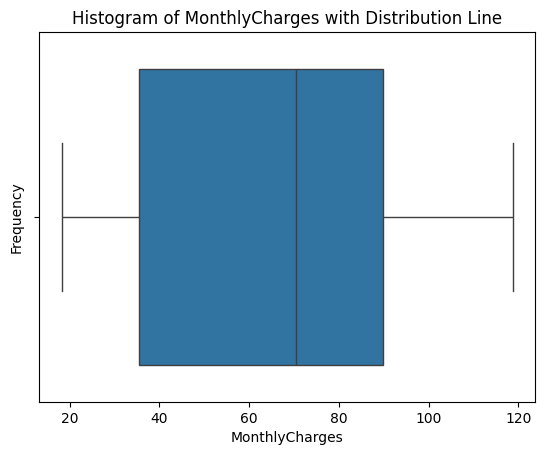

In [717]:
continuous_columns_to_plot = [
    'tenure',
    'MonthlyCharges']

for column in continuous_columns_to_plot:
    plt.figure()
    # sns.histplot(df[column], kde=True)
    sns.boxplot(x=df[column])
    plt.title(f'Histogram of {column} with Distribution Line')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [718]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

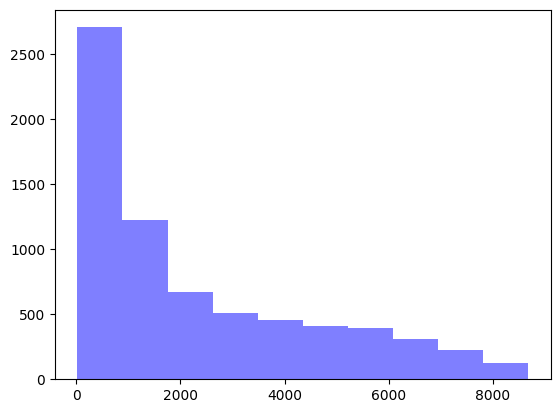

In [719]:
plt.hist(df['TotalCharges'], bins=10, alpha=0.5, color='b', label='TotalCharges')
plt.show()

<Axes: xlabel='TotalCharges'>

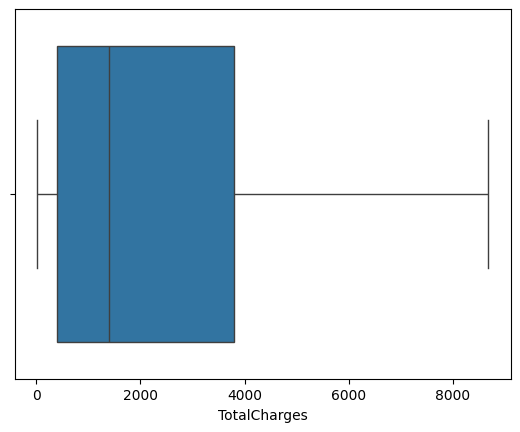

In [720]:
plt.figure()
sns.boxplot(x=df['TotalCharges'])

## Multivariable

In [721]:
df2 = df.copy()

In [722]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through all columns and apply LabelEncoder to columns with dtype 'object'
for column in df2.columns:
    if df2[column].dtype == 'object':
        df2[column] = label_encoder.fit_transform(df2[column])

df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


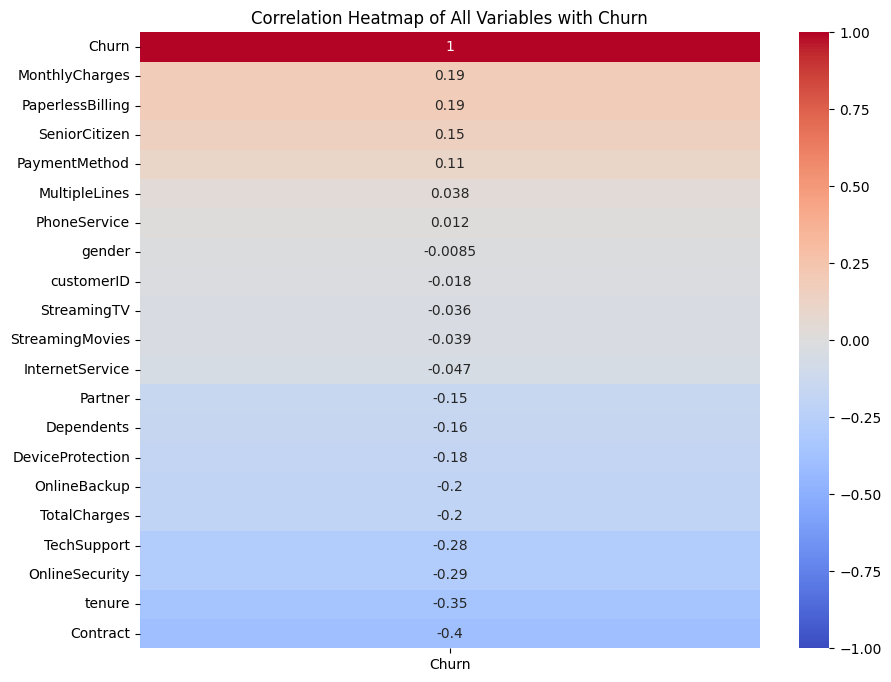

In [723]:
# Generate a heatmap of all variables with the churn column
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr()[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of All Variables with Churn')
plt.show()

# Data Preprocessing

In [724]:
from sklearn.preprocessing import StandardScaler, RobustScaler

Scaling will occur after the data split. Tenure and Monthly Charges use standard scaler due to having indications of normal distribution, while Total Charges uses Robust Scaler

In [725]:
from imblearn.over_sampling import SMOTE

Oversampling will be applied to the Churn target variable after splitting

Oversampling report: Accuracy across the models does not reach over 90, and resampling of the churn value made accuracy as well as the F1 score worse.

# Modelling

In [726]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [727]:
from sklearn.feature_selection import RFE

In [728]:
X = df2.drop(columns=['Churn', 'customerID'])
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [729]:
# # Due to imbalance in the target variable, we need to balance the dataset
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [730]:
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()

X_train[['tenure', 'MonthlyCharges']] = scaler_standard.fit_transform(X_train[['tenure', 'MonthlyCharges']])
X_train['TotalCharges'] = scaler_robust.fit_transform(X_train[['TotalCharges']])

X_test[['tenure', 'MonthlyCharges']] = scaler_standard.transform(X_test[['tenure', 'MonthlyCharges']])
X_test['TotalCharges'] = scaler_robust.transform(X_test[['TotalCharges']])

In [731]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6030,0,0,0,0,0.434674,0,1,0,0,0,2,0,2,2,0,1,0,-0.518620,0.204189
3410,1,0,0,0,-1.195652,1,0,0,0,0,0,0,2,0,0,0,1,-0.374443,-0.355833
5483,0,0,1,0,0.923772,1,2,1,0,0,2,0,0,0,0,1,2,0.432616,0.910916
5524,1,0,1,1,0.516190,1,0,0,2,0,0,2,0,0,2,0,0,-0.333013,0.345864
6337,0,0,1,1,0.923772,1,2,1,2,0,0,0,2,2,1,0,3,1.199902,1.204783


## Logistic Regression

In [732]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
# print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407



With Churn Resampling

In [733]:
# model = LogisticRegression()
# model.fit(X_train_resampled, y_train_resampled)

# # Evaluate the model
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

With Feature Selection

10

In [734]:
# model = LogisticRegression()
# rfe = RFE(model, n_features_to_select=10)
# X_train_selected = rfe.fit_transform(X_train, y_train)

# X_test_selected = rfe.transform(X_test)
# model.fit(X_train_selected, y_train)

# y_pred = model.predict(X_test_selected)
# print(classification_report(y_test, y_pred))

5

In [735]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_train_selected = rfe.fit_transform(X_train, y_train)

X_test_selected = rfe.transform(X_test)
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



With Class Weight Adjustment

In [736]:
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.81      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



With Ensemble

In [737]:
from imblearn.ensemble import BalancedBaggingClassifier

In [738]:
X_train_lrstrat, X_test_lrstrat, y_train_lrstrat, y_test_lrstrat = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

base_clf = LogisticRegression(random_state=42)
model = BalancedBaggingClassifier(estimator=base_clf, random_state=42)
model.fit(X_train_lrstrat, y_train_lrstrat)

y_pred_lrstrat = model.predict(X_test_lrstrat)
print(classification_report(y_test_lrstrat, y_pred_lrstrat))

c:\Users\Kasandika Andariefli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Kasandika Andariefli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



c:\Users\Kasandika Andariefli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Kasandika Andariefli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

## Random Forest

In [739]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)
# print(f'Random Forest Classifier Accuracy: {accuracy_rf_clf}')
print(classification_report(y_test, y_pred_rf_clf))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



With Churn Resampling

In [740]:
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train_resampled, y_train_resampled)

# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

With Feature Selection

10

In [741]:
# model = RandomForestClassifier(random_state=42)
# rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
# X_train_selected = rfe.fit_transform(X_train, y_train)

# X_test_selected = rfe.transform(X_test)
# model.fit(X_train_selected, y_train)

# y_pred = model.predict(X_test_selected)
# print(classification_report(y_test, y_pred))

5

In [742]:
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_train_selected = rfe.fit_transform(X_train, y_train)

X_test_selected = rfe.transform(X_test)
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1033
           1       0.58      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



With Class Weight Adjust

In [743]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



With Ensemble

In [744]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [745]:
# Split the dataset
X_train_rfstrat, X_test_rfstrat, y_train_rfstrat, y_test_rfstrat = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the BalancedRandomForestClassifier
model = BalancedRandomForestClassifier(random_state=42)
model.fit(X_train_rfstrat, y_train_rfstrat)

# Evaluate the model
y_pred_rfstrat = model.predict(X_test_rfstrat)
print(classification_report(y_test_rfstrat, y_pred_rfstrat))

c:\Users\Kasandika Andariefli\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Kasandika Andariefli\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Kasandika Andariefli\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the imple

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



## Naive Bayes

In [746]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb_clf = nb_clf.predict(X_test)
accuracy_nb_clf = accuracy_score(y_test, y_pred_nb_clf)
# print(f'Naive Bayes Classifier Accuracy: {accuracy_nb_clf}')
print(classification_report(y_test, y_pred_nb_clf))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.50      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407



With Churn Resampling

In [747]:
# model = GaussianNB()
# model.fit(X_train_resampled, y_train_resampled)

# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

With Feature Selection

10

In [748]:
# model = GaussianNB()
# rfe = RFE(model, n_features_to_select=10)
# X_train_selected = rfe.fit_transform(X_train, y_train)

# X_test_selected = rfe.transform(X_test)
# model.fit(X_train_selected, y_train)

# y_pred = model.predict(X_test_selected)
# print(classification_report(y_test, y_pred))

5

In [749]:
from sklearn.linear_model import LogisticRegression

# Use LogisticRegression for feature selection, Naive Bayes is incompatible with RFE
selector = RFE(LogisticRegression(), n_features_to_select=5)
X_train_selected = selector.fit_transform(X_train, y_train)

X_test_selected = selector.transform(X_test)

# Use GaussianNB for classification
model = GaussianNB()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1033
           1       0.46      0.77      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.72      0.67      1407
weighted avg       0.78      0.70      0.72      1407



With Class Weight Adjust

In [750]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



With Ensemble

In [751]:
X_train_nbstrat, X_test_nbstrat, y_train_nbstrat, y_test_nbstrat = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

base_clf = GaussianNB()
model = BalancedBaggingClassifier(estimator=base_clf, random_state=42)
model.fit(X_train_nbstrat, y_train_nbstrat)

y_pred_nbstrat = model.predict(X_test_nbstrat)
print(classification_report(y_test_nbstrat, y_pred_nbstrat))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.47      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.73      1407



# Report

Standard modelling: accuracy across the models does not reach over 90, and resampling of the churn value made accuracy as well as the F1 score worse.

RFE Feature Selection: the results are the same as pre-SMOTE result

Class Adjust: Logistic Regression results lowered, Random Forests remains with few changes, and an increase in Naive Bayes

**Ensemble Method: Accuracy is the lowest accross all 3 models, but the F1 score is also improved making them the least bias**